In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [20]:
data = "/Users/ausin/Desktop/Datasets/forex/gld_price_data.csv"

In [22]:
gold_df = pd.read_csv(data)
gold_df

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [24]:
gold_df.shape

(2290, 6)

In [25]:
gold_df.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [27]:
gold_df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [28]:
gold_df_without_date = gold_df.drop(['Date'], axis=1)

In [31]:
correlation = gold_df_without_date.corr()
correlation

,SPX,GLD,USO,SLV,EUR/USD
SPX,1.000000,0.049345,-0.591573,-0.274055,-0.672017
GLD,0.049345,1.000000,-0.186360,0.866632,-0.024375
USO,-0.591573,-0.186360,1.000000,0.167547,0.829317
SLV,-0.274055,0.866632,0.167547,1.000000,0.321631
EUR/USD,-0.672017,-0.024375,0.829317,0.321631,1.000000


<Axes: >

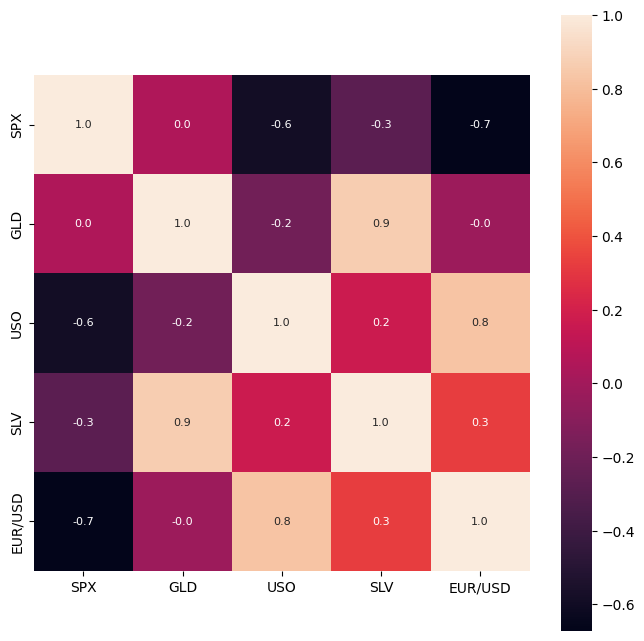

In [32]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8})

In [33]:
print(correlation['GLD'])


SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/var/folders/pg/srjqfn710wj9fq259msfg_7c0000gn/T/ipykernel_8340/375039519.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_df_without_date['GLD'],color='green')


<Axes: xlabel='GLD', ylabel='Density'>

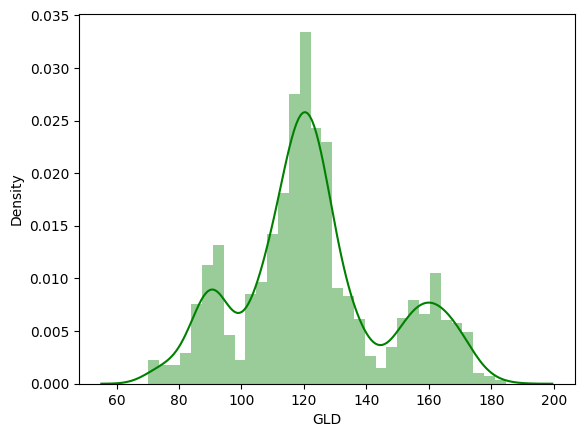

In [34]:
sns.distplot(gold_df_without_date['GLD'],color='green')


In [35]:
X = gold_df.drop(['Date','GLD'],axis=1)
y = gold_df['GLD']

In [40]:
X

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.1800,1.471692
1,1447.160034,78.370003,15.2850,1.474491
2,1411.630005,77.309998,15.1670,1.475492
3,1416.180054,75.500000,15.0530,1.468299
4,1390.189941,76.059998,15.5900,1.557099
...,...,...,...,...
2285,2671.919922,14.060000,15.5100,1.186789
2286,2697.790039,14.370000,15.5300,1.184722
2287,2723.070068,14.410000,15.7400,1.191753
2288,2730.129883,14.380000,15.5600,1.193118


In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [41]:
model = RandomForestRegressor(n_estimators=100)
model

RandomForestRegressor()

In [42]:
model.fit(X_train,y_train)

RandomForestRegressor()

In [44]:
y_predict = model.predict(X_test)
y_predict

array([122.6709996 , 130.72880322, 127.56659982,  96.57909714,
       118.77000075, 114.75029966, 124.9058011 , 117.67079938,
       108.03020098,  98.26379947,  95.61059927, 167.60189842,
       150.97940115, 116.47800041, 170.87060213,  84.9647995 ,
       123.1395986 , 109.11729747, 113.29050083, 131.7346032 ,
       124.25879902, 113.57500089, 116.09010057, 108.86029971,
       108.4592012 , 125.85859932, 119.55529996, 112.36539933,
       113.68630172, 125.41679908, 146.27870165,  89.52500028,
       167.66129991, 113.43279924, 108.30050126, 120.2519011 ,
       142.23599854, 161.19500133, 173.72629799, 153.00550128,
       119.52000094, 113.69910024, 121.41309955, 113.73739966,
       121.99330006, 107.91490087,  88.46409886, 114.46879917,
       129.7303026 , 117.97050105, 103.21660027, 129.68740266,
       107.30329825, 160.35430347, 131.54720025, 118.26929985,
       147.12730035, 135.90530236,  95.61940106, 124.69800146,
       114.74989846,  86.30510063, 104.27619899, 113.79

In [46]:
error_score = metrics.r2_score(y_test, y_predict)
print("R squared error : ", error_score)

R squared error :  0.9892510965267707


In [47]:
y_test_list = list(y_test)
y_test_list

[122.32,
 129.899994,
 126.980003,
 96.5,
 117.580002,
 115.0,
 125.440002,
 116.93,
 108.220001,
 98.830002,
 96.910004,
 168.789993,
 151.029999,
 115.839996,
 169.809998,
 85.129997,
 122.639999,
 107.849998,
 110.449997,
 131.240005,
 124.940002,
 115.379997,
 116.650002,
 109.25,
 110.529999,
 125.720001,
 123.709999,
 114.949997,
 114.290001,
 126.860001,
 146.869995,
 89.440002,
 167.270004,
 115.050003,
 117.110001,
 120.620003,
 141.630005,
 160.649994,
 173.309998,
 152.300003,
 117.459999,
 113.150002,
 121.309998,
 113.470001,
 121.349998,
 107.519997,
 88.839996,
 114.440002,
 130.559998,
 117.739998,
 99.669998,
 129.770004,
 106.169998,
 161.070007,
 127.93,
 115.940002,
 143.470001,
 130.110001,
 95.730003,
 124.360001,
 116.620003,
 85.599998,
 104.099998,
 112.610001,
 86.519997,
 122.400002,
 116.470001,
 112.660004,
 166.399994,
 91.989998,
 80.809998,
 160.559998,
 157.639999,
 103.419998,
 135.020004,
 110.400002,
 124.43,
 127.739998,
 112.440002,
 119.910004,
 1

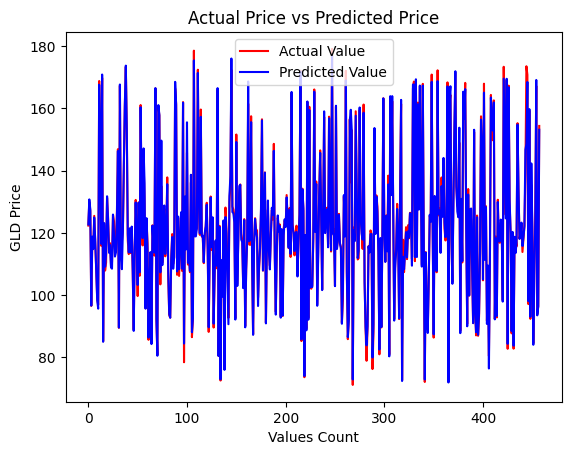

In [49]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(y_predict, color='blue', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Values Count')
plt.ylabel('GLD Price')
plt.legend()
plt.show()